In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
pulse_len = 300
k = 10.
N1 = 0.01
eps = 0.7
Lx, Lz = (2000000, 10000)



In [115]:
def tau_approx(m): 
    tau = Lx*np.pi*m**2/(2.*Lz*eps*N1*k)
    return tau
def tau_exact(m): 
    tau = tau_approx(m) + eps * (Lx/Lz) * (2. * (m*np.pi)**2 - 3.)/(12. * N1 * k * np.pi)
    return tau
def tau_off(m):
    tau = Lx*(6 + np.pi**2*m**2*(1.+3.*eps**2))/(6.*eps*N1*k*np.pi*Lz)
    return tau 


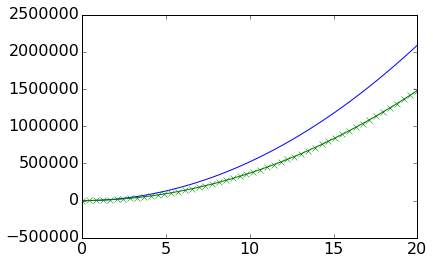

In [116]:
m = np.linspace(0,20)
plt.plot(m, tau_exact(m))
plt.plot(m, tau_off(m), marker = 'x')

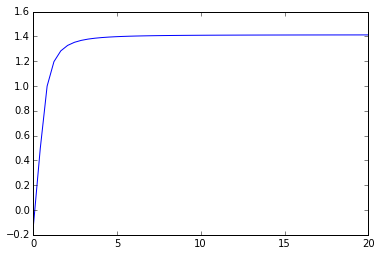

In [21]:
plt.plot(m, tau_exact(m)/tau_off(m))

In [186]:
import numpy as np
import h5py
import dedalus_plots as dp
from scipy import stats

sim_name = 'k2m1'
filepath = sim_name + "/" + sim_name + "_s1/" + sim_name + "_s1_p0.h5"
data = h5py.File(filepath, "r")
dict_vars = {'b3d':'buoyancy', 'tropenergy':'tropo energy'}

vars = dp.read_vars(data, dict_vars)
dims = dp.read_dims(data)
data.close()

#parameters
m = 1
k = 10.
N1 = 0.01
eps = 1
Lx, Lz = (2000000, 10000)


tau_approx = Lx*np.pi*m**2/(2.*Lz*eps*N1*k)
tau_exact = tau_approx + eps * (Lx/Lz) * (2. * (m*np.pi)**2 - 3.)/(12. * N1 * k * np.pi)

tau_off = Lx*(6 + np.pi**2*m**2*(1.+3.*eps**2))/(6.*eps*N1*k*np.pi*Lz)


energ_normed = vars['tropenergy'][:,0,0]/np.max(vars['tropenergy'][:,0,0])
energ_theory = np.exp(-(dims['t'] )/tau_exact)
energ_approx  = np.exp(-(dims['t'])/tau_approx)
energ_off  = np.exp(-(dims['t'] )/tau_off)

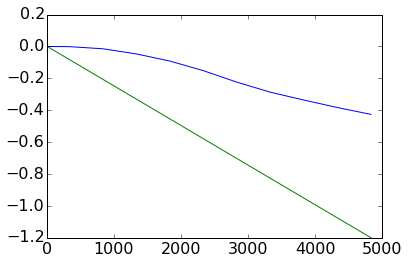

In [187]:
plt.plot(dims['t'], np.log(energ_normed))
plt.plot(dims['t'], np.log(energ_theory))

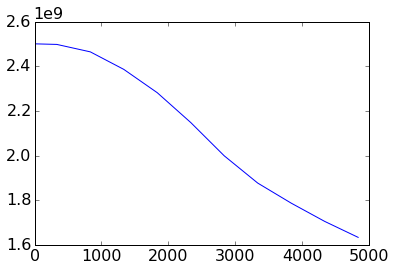

In [153]:
plt.plot(dims['t'], vars['tropenergy'][:,0,0])

In [141]:
from scipy import stats
import pickle

In [188]:
infile = open( "eps05.p", "rb" )
archive_list05 = pickle.load(infile)
infile = open( "eps1.p", "rb" )
archive_list1 = pickle.load(infile)
infile = open( "eps09.p", "rb" )
archive_list09 = pickle.load(infile)
infile = open( "eps1_m2.p", "rb" )
archive_list1_m2 = pickle.load(infile)

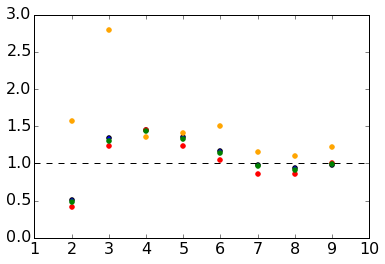

In [189]:
for a in archive_list1:
    plt.scatter(a['k'], a['tau']/a['tau_theory'])
for a in archive_list05:
    plt.scatter(a['k'], a['tau']/a['tau_theory'], color = 'red')
for a in archive_list09:
    plt.scatter(a['k'], a['tau']/a['tau_theory'], color = 'green')
    
for a in archive_list1_m2:
    plt.scatter(a['k'], a['tau']/a['tau_theory'], color = 'orange')
    
plt.axhline(y = 1, xmin= 0, xmax = 1, color = 'black', ls = '--')


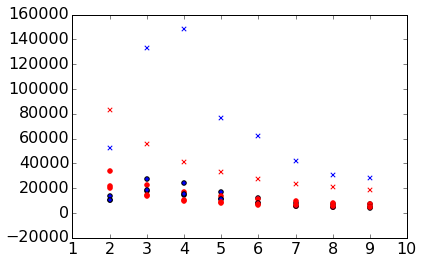

In [174]:
for a in archive_list1:
    plt.scatter(a['k'], a['tau'])
    plt.scatter(a['k'], a['tau_theory'], color= 'red')
for a in archive_list05:
    plt.scatter(a['k'], a['tau'])
    plt.scatter(a['k'], a['tau_theory'], color= 'red')
for a in archive_list09:
    plt.scatter(a['k'], a['tau'])
    plt.scatter(a['k'], a['tau_theory'], color= 'red')
for a in archive_list1_m2:
    plt.scatter(a['k'], a['tau'], marker = 'x')
    plt.scatter(a['k'], a['tau_theory'],  color= 'red', marker = 'x')

(0, 100000)

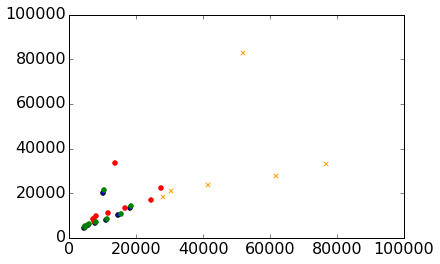

In [185]:
for a in archive_list1:
    plt.scatter(a['tau'], a['tau_theory'])
for a in archive_list05:
    plt.scatter(a['tau'], a['tau_theory'], color = 'red')
for a in archive_list09:
    plt.scatter(a['tau'], a['tau_theory'], color = 'green')
for a in archive_list1_m2:
    plt.scatter(a['tau'], a['tau_theory'], color = 'orange', marker = 'x')

plt.xlim(0,100000)
plt.ylim(0,100000)

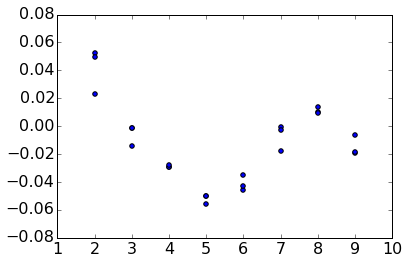

In [132]:
for a in archive_list1:
    plt.scatter(a['k'], a['intercept'])
for a in archive_list05:
    plt.scatter(a['k'], a['intercept'])
for a in archive_list09:
    plt.scatter(a['k'], a['intercept'])

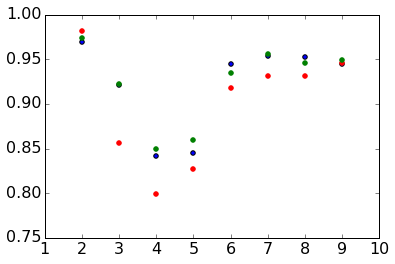

In [135]:
for a in archive_list1:
    plt.scatter(a['k'], a['r']**2)
for a in archive_list05:
    plt.scatter(a['k'], a['r']**2, color ='red')
for a in archive_list09:
    plt.scatter(a['k'], a['r']**2, color ='green')